In [1]:
"""
KNN 算法

"""

'\nKNN 算法\n\nK近邻算法：样本之间的距离来衡量是否同一类。\n'

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# 原始样本
raw_data_X = [[3.393533211,2.331273381],
             [2.110073483,1.781539638],
             [1.343808831,3.368360954],
             [3.582294042,4.679179110],
             [2.280362439,2.866990263],
             [7.423436942,4.696522875],
             [5.745051997,3.533989803],
             [9.172168622,2.511101045],
             [7.792783481,3.424088941],
             [7.939820817,0.791637231]
            ]
raw_data_Y = [0,0,0,0,0,1,1,1,1,1]

In [33]:
# 原始数据全部作为训练数据
X_train = np.array(raw_data_X)
Y_train = np.array(raw_data_Y)

# 定义两个要预测的点
x = np.array([8.093607318,3.365731514])

In [34]:
X_train

array([[3.39353321, 2.33127338],
       [2.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [35]:
Y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

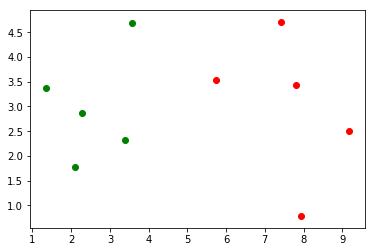

In [36]:
plt.scatter(X_train[Y_train == 0,0], X_train[Y_train == 0,1], color='g')
plt.scatter(X_train[Y_train == 1,0], X_train[Y_train == 1,1], color='r')
plt.show()

### KNN的过程

In [42]:
from math import sqrt

# distances = []
# for x_train in X_train:
#     d = sqrt(np.sum((x_train - x)**2))
#     distances.append(d)
# distances
     
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train ]
distances

[4.812566907609877,
 6.189696362066091,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [43]:
# 测试点离所有样本点的距离的降序排列，返回的是点的序号
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 4, 1, 2], dtype=int64)

In [44]:
nearest = np.argsort(distances)

In [45]:
# 求出最近的k个点对应的y
k = 6
topK_y = [Y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [46]:
from collections import Counter
Counter(topK_y)

Counter({0: 1, 1: 5})

In [48]:
# 取出得票最多的y对应的类别
votes = Counter(topK_y)
votes.most_common(1)

[(1, 5)]

In [49]:
predict_y = votes.most_common(1)[0][0]
# 测试样本x对应的预测类别 y
predict_y

1

### 使用scikit-learn中的KNN

In [51]:
# 导入sklearn中的KNN包
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# 设置k值
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [53]:
KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [57]:
# reshape(1, -1) 转成矩阵，第一个1表示只有一个数据（矩阵的行数），第二个-1表示由reshape自己决定维度
x_predict = x.reshape(1, -1)
y_predict = KNN_classifier.predict(x_predict)
y_predict

array([1])

### 参考sklearn封装自己的KNN

In [62]:
""" KNN是唯一一个不需要模型的算法，可以认为数据集本身就是模型 """
class KNN(object):
    def __init__(self,k):
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._Y_train = None
        
    def fit(self, X_train, Y_train):
        """ 根据训练数据集X_train和Y_train训练kNN分类器 """
        assert X_train.shape[0] == Y_train.shape[0], "the size of X_train must equal to the size of Y_train"
        assert self.k <= X_train.shape[0], "the size of X_train must be at least k."

        self._X_train = X_train
        self._Y_train = Y_train
        # 参考sklearn 返回对象本身
        return self
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回标示X_predict的结果向量"""
        assert self._X_train is not None and self._Y_train is not None, "mush fit before predict"
        assert self._X_train.shape[1] == X_predict.shape[1], "the feature number of x must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        """给定单个待预测数据x，返回x的预测结果值"""
        distances = [sqrt(np.sum((x_train-x)**2)) for x_train in self._X_train]
        nearset = np.argsort(distances)

        topK_y = [self._Y_train[i] for i in nearset[:self.k]]
        votes = Counter(topK_y)
        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        # 重构__repr__函数
        # 重构__repr__方法后，不管直接输出对象还是通过print打印的信息都按我们__repr__方法中定义的格式进行显示了
        # 重构__str__方法，只能在print时生效
        return "KNN(k=%d)" % self.k

In [63]:
knn = KNN(k=6)

In [64]:
knn

KNN(k=6)

In [65]:
knn.fit(X_train, Y_train)

KNN(k=6)

In [66]:
y_predict = knn.predict(x_predict)

In [67]:
y_predict

array([1])

In [68]:
y_predict[0]

1

### 判断机器学习算法的性能

In [69]:
import numpy as np
import matplotlib as plt
from sklearn import datasets